In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

[0, 1, 0, 2]

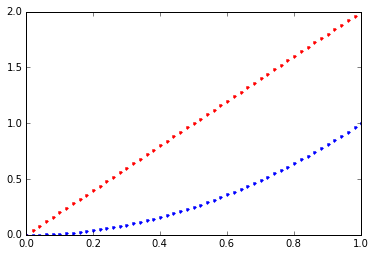

In [2]:
#start with simple function
# pdf = 2x (normalized)
# cdf = x^2
N = 500 #number of points
x = np.linspace(0, 10, N)
pdf = 2*x
cdf = x**2
plt.plot(x, pdf, 'r.')
plt.plot(x, cdf, 'b.')
plt.axis([0,1,0,2])

[0, 3.141592653589793, 0, 1]

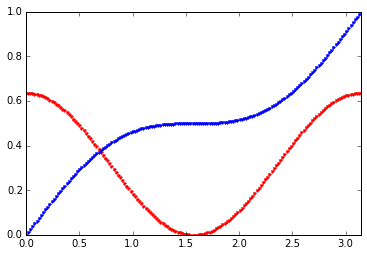

In [3]:
# more complex function
# pdf = sin^2(x) + cos(x)
# cdf = e^-(x^2)
pdf = (2./np.pi)*np.cos(x)**2
cdf = (1./np.pi)*(x+np.sin(x)*np.cos(x))
#cdf = np.e**(-x**2)
plt.plot(x, pdf, 'r.')
plt.plot(x, cdf, 'b.')
plt.axis([0,np.pi,0,1])

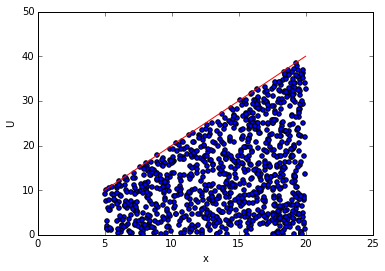

In [4]:
# rejection sampling method
#Simple function again
# pdf = 2x
# test from range 5-20
#need to normalize pdf over range from 5 to 20?


N = 1000 #number of samples to draw
total = 0 #initial number of samples drawn that fall in range
env = 50. #envelope function, needs to be above PDF in range you're looking at (at x=20, pdf = 40)
#currently a flat line above the values

while total < N: #while you don't have all the samples yet
    U = 50*np.random.rand() #random number, map to range of y values (0, 50?)
    x = np.random.rand()*15 + 5 #random number mapped to range of x values (5, 20)
    pdf = (2.)*x
    
    if U < (pdf)/(env): # if condition is met, accept point
        total = total + 1 #add one to the count
        plt.figure(1)
        plt.scatter(x, U*50) #graph the point. why have to multiply by 50 again?
        plt.axis([0, 25, 0, 50])
    else:
        pass #otherwise do nothing
    
plt.figure(1)
x_exp = np.linspace(5, 20, 100)
exp_pdf = (2.)*x_exp #experimental pdf
plt.plot(x_exp, exp_pdf, 'r')
plt.xlabel("x")
plt.ylabel("U")
